# Benchmarking binding classification with a 2 layer NN


----

- Cross validation using the train data and evaluation on 'blind test set'.

- Using all observations (all species, </=/> values too)

- simple one-hot encoding scheme for all categorical variables (species, hla type/subtypes,sequence)



----

In [1]:
import os
os.environ['THEANO_FLAGS']='device=gpu1'
import os,sys

#my functions
sys.path.append('../')
from utils import load_data,my_keras_cv_predict,my_keras_fit_predict,plot_roc

#go to working dir
work_dir='/data/data1/ribli/mhc/'
os.chdir(work_dir)

%matplotlib inline

Using Theano backend.
Using gpu device 1: GeForce GTX 670 (CNMeM is enabled with initial size: 95.0% of memory, cuDNN 5004)


### Load data

In [2]:
X_train,_,y_train,X_test,_,y_test=load_data(hla_representation='one-hot',
                                        species_representation='one-hot',
                                        seq_representation='one-hot')

### CV

In [3]:
#create a very simple deepish model
from keras.models import Sequential
from keras.layers import Dense

#create model creator
def get_model(input_dim):
    """Creates Keras model needed."""
    model = Sequential()
    model.add(Dense(512, input_dim=input_dim,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

#train
y_train_pred=my_keras_cv_predict(get_model,X_train,y_train,n_folds=5,patience=3,verbose=2)

Train on 99110 samples, validate on 11013 samples
Epoch 1/100
Epoch 00000: val_loss improved from inf to 0.34866, saving model to best_model
2s - loss: 0.4332 - val_loss: 0.3487
Epoch 2/100
Epoch 00001: val_loss improved from 0.34866 to 0.30945, saving model to best_model
2s - loss: 0.3259 - val_loss: 0.3095
Epoch 3/100
Epoch 00002: val_loss improved from 0.30945 to 0.30154, saving model to best_model
2s - loss: 0.2838 - val_loss: 0.3015
Epoch 4/100
Epoch 00003: val_loss improved from 0.30154 to 0.30028, saving model to best_model
2s - loss: 0.2575 - val_loss: 0.3003
Epoch 5/100
Epoch 00004: val_loss improved from 0.30028 to 0.29460, saving model to best_model
2s - loss: 0.2349 - val_loss: 0.2946
Epoch 6/100
Epoch 00005: val_loss did not improve
2s - loss: 0.2138 - val_loss: 0.3110
Epoch 7/100
Epoch 00006: val_loss did not improve
2s - loss: 0.1945 - val_loss: 0.3061
Epoch 8/100
Epoch 00007: val_loss did not improve
2s - loss: 0.1780 - val_loss: 0.3172
Epoch 9/100
Epoch 00008: val_loss

AUC: 0.924404898191


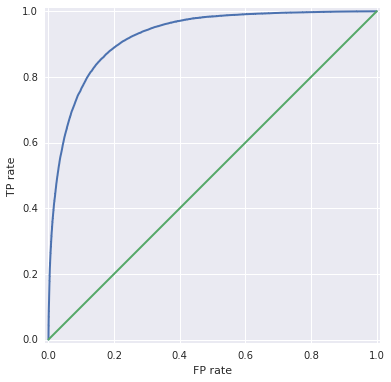

In [4]:
plot_roc(y_train,y_train_pred)

---

### Predict on blind data

In [5]:
y_test_pred=my_keras_fit_predict(get_model,X_train,y_train,X_test,
                      validation_split=0.1,patience=3,nb_epoch=100)

Train on 123888 samples, validate on 13766 samples
Epoch 1/100
123888/123888 [==============================] - 3s - loss: 0.4115 - val_loss: 0.3286
Epoch 2/100
123888/123888 [==============================] - 3s - loss: 0.3074 - val_loss: 0.3162
Epoch 3/100
123888/123888 [==============================] - 3s - loss: 0.2722 - val_loss: 0.2910
Epoch 4/100
123888/123888 [==============================] - 3s - loss: 0.2467 - val_loss: 0.2889
Epoch 5/100
123888/123888 [==============================] - 3s - loss: 0.2252 - val_loss: 0.2886
Epoch 6/100
123888/123888 [==============================] - 3s - loss: 0.2060 - val_loss: 0.2980
Epoch 7/100
123888/123888 [==============================] - 3s - loss: 0.1886 - val_loss: 0.2996
Epoch 8/100
123888/123888 [==============================] - 3s - loss: 0.1728 - val_loss: 0.3053
Epoch 9/100
123616/123888 [============================>.] - ETA: 0s - loss: 0.1572Epoch 00008: val_loss did not improve
Epoch 00008: early stopping
123888/123888 [=

AUC: 0.905430599886


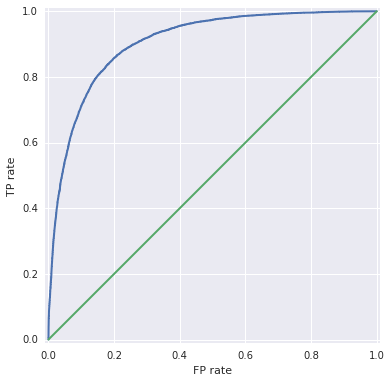

In [6]:
plot_roc(y_test,y_test_pred)

---

### Conclusion: passed 'state of the art'

Method | CV | Blind test
--- | --- | ---
SMMPMBEC | 0.8989 | 0.8474
NetMHC | 0.8930 | 0.8833
NetMHCpan |0.9176 | 0.8830
2layer net | **0.9244** | **0.9054**


---

